In [25]:
import numpy as np
import json
import matplotlib.pyplot as plt

In [26]:
# Get constants
with open("params_train.json", 'r') as file:
    params = json.load(file)

agent_name      = params['training']['AGENT_NAME']
model_name      = params['training']['MODEL_NAME']
training_rounds = params['training']['TRAINING_ROUNDS']
scenario        = params['training']['SCENARIO']
old_model       = params['training']['START_TRAINING_WITH']

alpha  = params['Q-update']['ALPHA']
gamma  = params['Q-update']['GAMMA']
mode   = params['Q-update']['MODE']
n_step = params['Q-update']['N']


# Print training trivia
train_str = f"Trained 'agent_{agent_name}_{model_name}' in '{scenario}' for {training_rounds} rounds "
if old_model == "RESET":
    train_str += f"from scratch."
else:
    train_str += f"starting with '{old_model}'."
print(train_str)
print(f"Performed Q-update in {n_step}-step {mode} mode.  (alpha = {alpha}, gamma = {gamma})")

Trained 'agent_h6_coin-hunter2' in 'loot-box' for 3000 rounds from scratch.
Performed Q-update in 5-step SARSA mode.  (alpha = 0.1, gamma = 1)


In [27]:
# All possible features
all_direction_features = np.array(
    [
        [0, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 0, 1, 1],
        [0, 1, 1, 1],
        [1, 1, 1, 1],
        [0, 0, 0, 2],
        [0, 0, 1, 2],
        [0, 1, 1, 2],
        [1, 1, 1, 2],
        [0, 0, 2, 2],
        [0, 1, 2, 2],
        [1, 1, 2, 2],
        [0, 2, 2, 2],
        [1, 2, 2, 2],
        [2, 2, 2, 2],   
    ]
)
all_own_spot_features  = np.array([0, 1, 2])
all_mode_features      = np.array([0, 1, 2])  

### Evaluating the trained model

In [28]:
trained_model = np.load(f"model_{agent_name}_{model_name}.npy")
Sa_counter    = np.load(f"sa_counter_{agent_name}_{model_name}.npy")
policy        = np.argmax(trained_model, axis = -1)

In [29]:
print(np.mean(np.sum(Sa_counter, axis=-1)))
print(np.median(np.sum(Sa_counter, axis=-1)))

15909.422222222222
367.0


In [30]:
def look_up_q_tensor(f5 = 1):
    print(f"Q-Tensor for case (f5 = {f5}):")
    print(f"state  direction features   policy  trained model  {'':20}number of encounters")
    for i in range(len(all_direction_features)):
        line = f"{i:2}{'':2}{all_direction_features[i]} {[f5]}{'':2}{policy[i, f5]}{'':2}["
        for Q_value in trained_model[i, f5]:
            line += f"{Q_value:-7.1f}"
        line += f"]  {np.sum(Sa_counter[i, f5]):5} ["
        for count in Sa_counter[i, f5]:
            line += f" {count:5}"
        line += f"]"
        print(line)

In [31]:
look_up_q_tensor(f5 = 0)

Q-Tensor for case (f5 = 0):
state  direction features   policy  trained model                      number of encounters
 0  [0 0 0 0] [0]  4  [   -7.1   -7.1   -7.1   -7.1   -7.0   -7.3]   2397 [   185   173   172   162  1568   137]
 1  [0 0 0 1] [0]  3  [   -2.5   -4.7   -3.0  331.0   -4.9   -5.0]   2352 [     9    16    13  2278    22    14]
 2  [0 0 1 1] [0]  3  [    0.0    0.0    6.6  325.5    0.0    0.0]    367 [     1     1     2   360     1     2]
 3  [0 1 1 1] [0]  0  [    0.0    0.0    0.0    0.0    0.0    0.0]      0 [     0     0     0     0     0     0]
 4  [1 1 1 1] [0]  0  [    0.0    0.0    0.0    0.0    0.0    0.0]      0 [     0     0     0     0     0     0]
 5  [0 0 0 2] [0]  3  [   -7.9   -7.8   -7.8  332.4   -6.9   -7.9]  16194 [   136   146   148 15496   144   124]
 6  [0 0 1 2] [0]  3  [   -3.5   -2.9   27.7  317.8   -2.5   -4.1]   1122 [    16    11    45  1024    11    15]
 7  [0 1 1 2] [0]  3  [    0.0    1.3    1.6  260.0    0.0    0.0]    144 [     1     1  

In [32]:
look_up_q_tensor(f5 = 1)

Q-Tensor for case (f5 = 1):
state  direction features   policy  trained model                      number of encounters
 0  [0 0 0 0] [1]  4  [   41.1   29.9   39.5   51.8  333.0   82.2]   6700 [    68    74    56    64  6382    56]
 1  [0 0 0 1] [1]  3  [   40.7   46.5   47.4  332.3   91.7   75.3]   6944 [    52    58    54  6652    68    60]
 2  [0 0 1 1] [1]  3  [    7.9   -0.5   35.0  325.3    5.8    9.7]   1113 [    12     4     9  1076     6     6]
 3  [0 1 1 1] [1]  2  [   -0.9   33.3  327.9   31.2   46.4   41.9]   2690 [     6    11  2652     9     8     4]
 4  [1 1 1 1] [1]  0  [   75.2    0.0    0.0    0.0    0.0    0.0]      4 [     4     0     0     0     0     0]
 5  [0 0 0 2] [1]  3  [  218.4  230.3  223.9  324.3  234.6  256.5]  146206 [   766  1321  1907 129485 11441  1286]
 6  [0 0 1 2] [1]  3  [  267.0  257.5  263.2  331.2  266.9  251.8]  277080 [  4463  3472 25009 197713 44804  1619]
 7  [0 1 1 2] [1]  3  [  118.4  177.9  222.2  330.5  191.8  207.4]  58130 [   272   2

In [33]:
look_up_q_tensor(f5 = 2)

Q-Tensor for case (f5 = 2):
state  direction features   policy  trained model                      number of encounters
 0  [0 0 0 0] [2]  4  [   19.4   19.1    2.1   11.4  329.9   20.4]   1818 [    19    33    28    26  1689    23]
 1  [0 0 0 1] [2]  5  [   50.1   95.1   68.0   53.1  107.3  322.9]  10609 [   122   123   110   147   341  9766]
 2  [0 0 1 1] [2]  5  [  123.1  146.6   82.9  161.7  105.5  331.1]  17612 [   116   125   359   309   113 16590]
 3  [0 1 1 1] [2]  5  [   80.2  125.6  101.2   79.9   90.7  330.7]   8060 [    52    36   125   213    45  7589]
 4  [1 1 1 1] [2]  2  [  224.3  160.9  324.5  195.8  176.9  240.3]  57337 [    97    93 56776    82   193    96]
 5  [0 0 0 2] [2]  5  [   -0.4    7.0   -1.1   -0.9    1.4  257.3]     85 [     2    24     3     2     2    52]
 6  [0 0 1 2] [2]  2  [   22.4   21.3  239.4   11.0    5.2   56.0]   2036 [     2     5  2021     2     1     5]
 7  [0 1 1 2] [2]  3  [    6.8    0.0    0.0  157.4    0.0    0.0]     34 [    22     0  

## Looking at the training process

### Training performance over rounds

In [34]:
def moving_average (x, w):
    """
    from https://newbedev.com/how-to-calculate-rolling-moving-average-using-numpy-scipy
    """
    return np.convolve(x, np.ones(w), 'valid') / w

In [35]:
with open("results_train.json", 'r') as file:
    training_results = json.load(file)

In [36]:
number_of_rounds = training_results['by_agent'][f"agent_{agent_name}"]['rounds']
round_list       = list(training_results['by_round'])
rounds           = np.arange(number_of_rounds) + 1
collected_coins  = np.zeros(number_of_rounds, dtype = int)
round_lengths    = np.zeros(number_of_rounds, dtype = int)
kills            = np.zeros(number_of_rounds, dtype = int)
suicides         = np.zeros(number_of_rounds, dtype = int)
died             = np.zeros(number_of_rounds, dtype = int)
invalid_moves    = np.zeros(number_of_rounds, dtype = int)

for round_name in round_list:
    round_dict             = training_results['by_round'][round_name]
    round                  = round_dict['round'] - 1   # round index
    collected_coins[round] = round_dict['coins'][0]
    round_lengths[round]   = round_dict['steps']
    kills[round]           = round_dict['kills'][0]
    suicides[round]        = round_dict['suicides'][0]
    died[round]            = round_dict['got killed'][0]
    invalid_moves[round]   = round_dict['invalid'][0]


In [37]:
coin_speed = collected_coins / round_lengths


survived        = 1 - died
was_killed      = died - suicides
steps_survived  = np.where(died, round_lengths, 400)

In [40]:
avg_length   = 50   # number of rounds to average over

rounds_avg = rounds[avg_length-1:]

coin_speed_rate     = moving_average(coin_speed, avg_length)
coin_count_rate     = moving_average(collected_coins, avg_length)
kill_rate           = moving_average(kills, avg_length)
suicide_rate        = moving_average(suicides, avg_length)
was_killed_rate     = moving_average(was_killed, avg_length)
died_rate           = moving_average(died, avg_length)
steps_survived_rate = moving_average(steps_survived, avg_length)


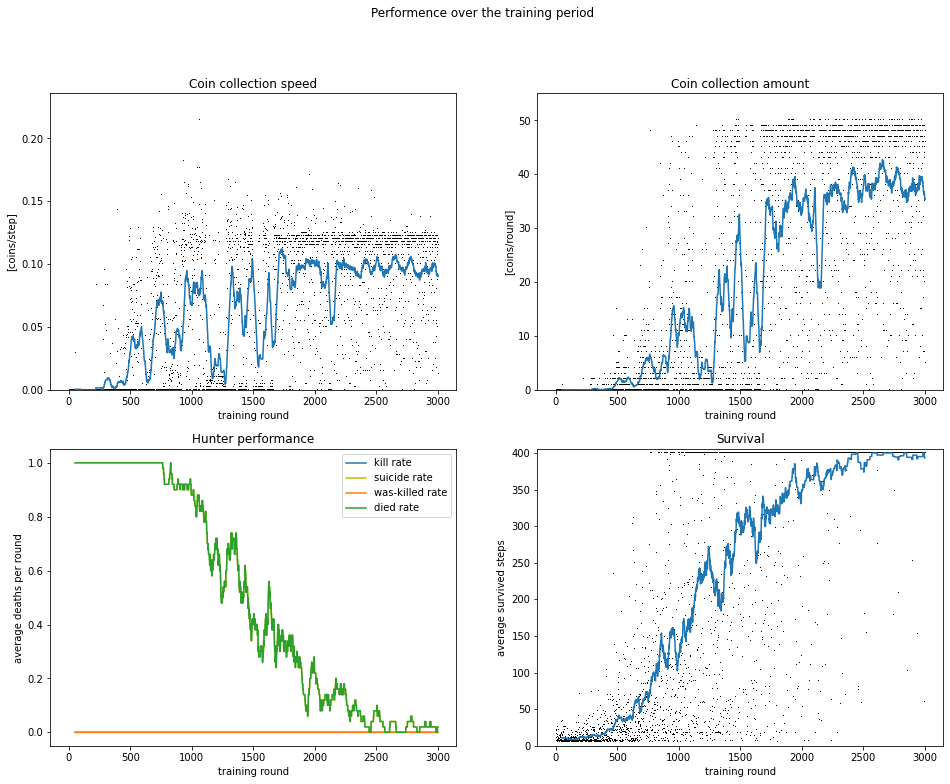

In [41]:
plt.figure(figsize = (16,12))
plt.suptitle("Performence over the training period")

plt.subplot(2, 2, 1)
plt.plot(rounds, coin_speed, ',k')
plt.plot(rounds_avg, coin_speed_rate)
plt.ylim((0, 1.1*max(coin_speed)))
plt.title("Coin collection speed")
plt.ylabel("[coins/step]")   # speed of 0.4 would be considerad great performance
plt.xlabel("training round")

plt.subplot(2, 2, 2)
plt.plot(rounds, collected_coins, ',k')
plt.plot(rounds_avg, coin_count_rate)
plt.ylim((0, 1.1*max(collected_coins)))
plt.title("Coin collection amount")
plt.ylabel("[coins/round]")   # speed of 0.4 would be considerad great performance
plt.xlabel("training round")

plt.subplot(2, 2, 3)
plt.plot(rounds_avg, kill_rate, label = "kill rate")
plt.plot(rounds_avg, suicide_rate, 'y', label = "suicide rate")
plt.plot(rounds_avg, was_killed_rate, label = "was-killed rate")
plt.plot(rounds_avg, died_rate, label = "died rate")
plt.xlim(-0.05*number_of_rounds, 1.05*number_of_rounds)
plt.title("Hunter performance")
plt.ylabel("average deaths per round")   # speed of 0.4 would be considerad great performance
plt.xlabel("training round")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(rounds, steps_survived, ',k')
plt.plot(rounds_avg, steps_survived_rate)
plt.ylim(0, 405)
plt.xlim(-0.05*number_of_rounds, 1.05*number_of_rounds)
plt.title("Survival")
plt.ylabel("average survived steps")   # speed of 0.4 would be considerad great performance
plt.xlabel("training round")

plt.show()



In [22]:
def analyze_action():
    title_str = "Evolution of actions"
    
    Q_action = np.mean(allQs, axis = (1,2))
    labels  = ["action 0", "action 1", "action 2", "action 3", "WAIT", "BOMB"]

    plt.plot(np.arange(number_of_rounds/100) + 1, Q_action, label = labels)
    plt.title(title_str)
    plt.ylabel("Mean Q-value")
    plt.xlabel("training round")
    plt.legend()
    plt.show()

In [23]:
def analyze_state (state):
    state_index, f5 = state
    Q_state = allQs[:, state_index, f5]
    labels  = ["action 0", "action 1", "action 2", "action 3", "WAIT", "BOMB"]

    plt.plot(np.arange(training_rounds/100) + 1, Q_state, label = labels)
    plt.title(f"Evolution of policies in state {state}")
    plt.ylabel("Q-value")
    plt.xlabel("training round")
    plt.legend()
    plt.show()

### Evolution of the Q-model

In [24]:
allQs = np.load("Qtrain.npy")

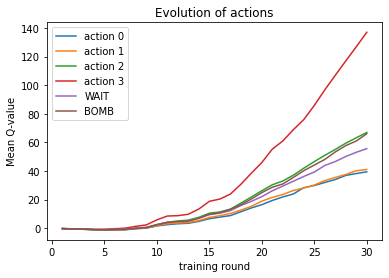

In [25]:
analyze_action()

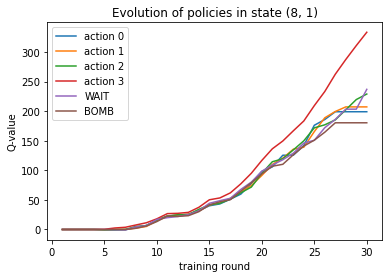

In [26]:
analyze_state((8, 1))

In [20]:
look_up_q_tensor(0)

Q-Tensor for case (f5 = 0):
state  direction features   policy  trained model                      number of encounters
 0  [0 0 0 0] [0]  4  [   -6.4   -6.4   -6.3   -6.2   -6.2   -6.3]   2002 [   166   148   181   134  1243   130]
 1  [0 0 0 1] [0]  3  [   -3.9   -5.2   -4.6   44.3   -4.1   -6.0]   1690 [    35    58    35  1471    43    48]
 2  [0 0 1 1] [0]  2  [    0.0    0.0   49.5   -0.6   -0.9   -0.5]    277 [     4     3   260     1     8     1]
 3  [0 1 1 1] [0]  1  [   -0.5    5.0    0.0    0.0    0.0    0.0]      3 [     1     1     0     0     1     0]
 4  [1 1 1 1] [0]  0  [    0.0    0.0    0.0    0.0    0.0    0.0]      0 [     0     0     0     0     0     0]
 5  [0 0 0 2] [0]  3  [   -6.8   -6.8   -6.8   44.8   -6.0   -6.8]   4472 [   103    91    99  3996   105    78]
 6  [0 0 1 2] [0]  3  [   -3.3   -3.7   -1.1   48.2   -1.1   -2.1]    571 [    21    10    14   509     9     8]
 7  [0 1 1 2] [0]  3  [    0.0    1.1    0.0   42.1    0.0    0.0]     43 [     1     1  